In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("housing.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
df.shape

(489, 4)

# Analyse Exploratoire des donnees

In [4]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


<Axes: >

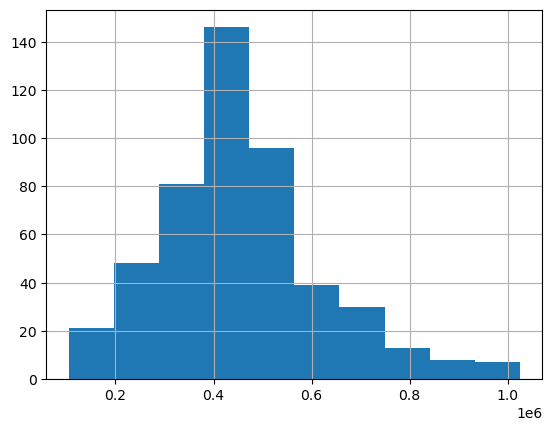

In [5]:
df.MEDV.hist()

# Identification des donnees manquantes

# Choix des caracteristiques pertinentes 

In [6]:
df = df.apply(pd.to_numeric,errors='coerce')
cor = df.corr()
cor.MEDV.sort_values(ascending=False)

MEDV       1.000000
RM         0.697209
PTRATIO   -0.519034
LSTAT     -0.760670
Name: MEDV, dtype: float64

In [7]:
df.nunique()

RM         430
LSTAT      442
PTRATIO     44
MEDV       228
dtype: int64

In [8]:
df.count()

RM         489
LSTAT      489
PTRATIO    489
MEDV       489
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


# Entrainer le model

In [10]:
X = df.drop('MEDV', axis=1)
X.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [11]:
y = df.MEDV
y.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

# Division du jeu de donnees en train et test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7243531046214164

In [14]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv =  ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.65746221, 0.76692436, 0.65760774, 0.72282102, 0.76022894])

In [15]:
def predict_price(RM, PTRATIO, LSTAT):
    # Créer un DataFrame avec toutes les caractéristiques définies à zéro
    input_data = pd.DataFrame(np.zeros((1, len(X.columns))), columns=X.columns)
    
    # Mettre à jour les valeurs de RM, PTRATIO, et LSTAT
    input_data['RM'] = RM
    input_data['PTRATIO'] = PTRATIO
    input_data['LSTAT'] = LSTAT
    
    # Utiliser le modèle entraîné pour prédire le prix
    return lr.predict(input_data)[0]


In [16]:
predict_price(3.5,4.3,6)

603226.5293683277

In [17]:
import pickle

# Sauvegarder le modèle entraîné dans un fichier
with open('model.pkl', 'wb') as f:
    pickle.dump(lr, f)


In [5]:
import numpy as np
a = np.arange(5, 10)
a 

array([5, 6, 7, 8, 9])

In [6]:
a = np.arange(5)

print(a <= 3)

[ True  True  True  True False]


In [7]:
import pandas as pd

certificates_earned = pd.Series(
    [8, 2, 5, 6],
    index=['Tom', 'Kris', 'Ahmad', 'Beau']
)

print(certificates_earned)

Tom      8
Kris     2
Ahmad    5
Beau     6
dtype: int64


In [13]:
import pandas as pd

certificates_earned = pd.DataFrame({
    'Certificates': [8, 2, 5, 6],
    'Time (in months)': [16, 5, 9, 12]
})

certificates_earned.index = ['Tom', 'Kris', 'Ahmad', 'Beau']

certificates_earned

,Certificates,Time (in months)
Tom,8,16
Kris,2,5
Ahmad,5,9
Beau,6,12


In [14]:
certificates_earned = pd.DataFrame({
    'Certificates': [8, 2, 5, 6],
    'Time (in months)': [16, 5, 9, 12]
})
names = ['Tom', 'Kris', 'Ahmad', 'Beau']

certificates_earned.index = names
longest_streak = pd.Series([13, 11, 9, 7], index=names)
certificates_earned['Longest streak'] = longest_streak

print(certificates_earned)

       Certificates  Time (in months)  Longest streak
Tom               8                16              13
Kris              2                 5              11
Ahmad             5                 9               9
Beau              6                12               7


In [19]:


s = pd.Series([3, np.nan, 1, np.nan])

print(s.notnull().sum())

2


In [20]:
s = pd.Series([np.nan, 1, 2, np.nan, 3])
s = s.fillna(method='ffill')

print(s)

0    NaN
1    1.0
2    2.0
3    2.0
4    3.0
dtype: float64


<Axes: >

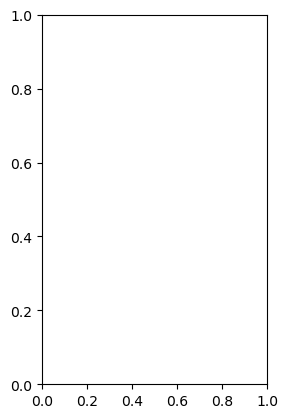

In [24]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)